# Plotting with Seaborn

Most plotting in Python is done with `matplotbib`. Great library, very versatile, and a large variety of plots. Unfortunately, it takes often many lines of codes to make a plot of production quality.

Apart from using `matplotlib` directly, we can use either `pandas` - and we have done that: `df['column'].hist()` - or `seaborn`.

`Seaborn` is not as quite as versatile, but the most common plots types are available, and the result is already of high quality. Moreover, as `seaborn` is build on top of `matplotlib` you can use `matplotlib` commands to enhance `seaborn` plots. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Public data from the annual CDC Behavioral Risk Factor Surveillance System (BRFSS) telephone survey. The full data has 200+ columns, here are only four. [BRFSS](https://www.cdc.gov/brfss/index.html)

Compute Britisch imperial and $z$-scores for the heights and weights right away.

In [6]:
df = pd.read_csv('BRFSS.csv')
df['wght_lb']=df['wght_kg']/0.454
df['hght_in']=df['hght_cm']/2.54
df['z-hght']=(df['hght_cm']-df['hght_cm'].mean())/df['hght_cm'].std()
df['z-wght']=(df['wght_kg']-df['wght_kg'].mean())/df['wght_kg'].std()
df.describe()

,age,sex,wght_kg,hght_cm,wght_lb,hght_in,z-hght,z-wght
count,410856.000000,414509.000000,398484.000000,409129.000000,398484.000000,409129.000000,4.091290e+05,3.984840e+05
mean,54.862180,1.624368,78.992453,168.825190,173.992187,66.466610,1.537787e-15,-7.190968e-13
std,16.737702,0.484286,19.546157,10.352653,43.053209,4.075848,1.000000e+00,1.000000e+00
min,18.000000,1.000000,20.000000,61.000000,44.052863,24.015748,-1.041522e+01,-3.018110e+00
25%,43.000000,1.000000,64.550000,160.000000,142.180617,62.992126,-8.524568e-01,-7.388896e-01
50%,55.000000,2.000000,77.270000,168.000000,170.198238,66.141732,-7.970803e-02,-8.812234e-02
75%,67.000000,2.000000,90.910000,175.000000,200.242291,68.897638,5.964472e-01,6.097131e-01
max,99.000000,2.000000,309.090000,236.000000,680.814978,92.913386,6.488657e+00,1.177201e+01


A box-plot. The box represents the interquartile range. Outliers are defined by 1.5-times-IQR from the quartiles, and the whiskers extend from the minimum to the maximum of the non-outlier points.

**Task**: Characterize the datasets from the boxplots.

<AxesSubplot:>

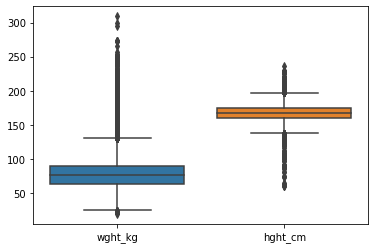

In [11]:
sns.boxplot(data=df[['wght_kg','hght_cm']])

<AxesSubplot:xlabel='wght_kg', ylabel='Count'>

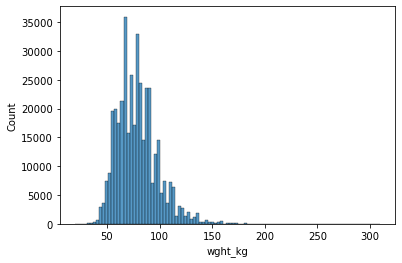

In [12]:
# Seaborn makes nice histograms
sns.histplot(data=df['wght_kg'], bins=101)

Try changing `stat='count'` to
* stat='frequency'
* stat='probability'
* stat='percent'
* stat='density'

<AxesSubplot:xlabel='hght_cm', ylabel='Count'>

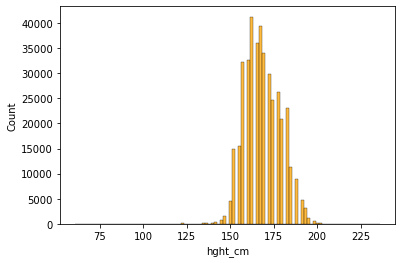

In [16]:
sns.histplot(data=df['hght_cm'], stat='count', bins=101, color='orange')

In [ ]:
sns.kdeplot(data=df['wght_cm'], color='green', label='height')
sns.kdeplot(data=df['wght_kg'], color='blue', label='weight')
plt.legend()

We will learn about *probability density functions* (PDF), models for PDFs such as the bell-curve, and how to turn real discreet data into a smooth PDF. However, if you just want a plot, `seaborn` can do it in a single command: `kdeplot` takes data and plot a *kernal density function* a PDF approximated piece-wise from data.

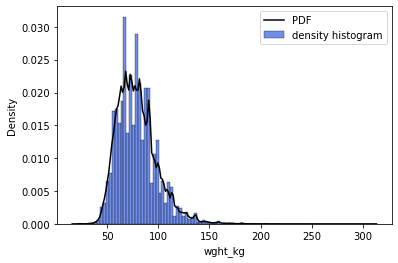

In [20]:
sns.histplot(data=df['wght_kg'], stat='density', color='royalblue', 
             label='density histogram', bins=101)
sns.kdeplot(data=df['wght_kg'], color='black', label='PDF')
plt.legend()

Now we can plot the heights and weights in a single plot without too much clutter.

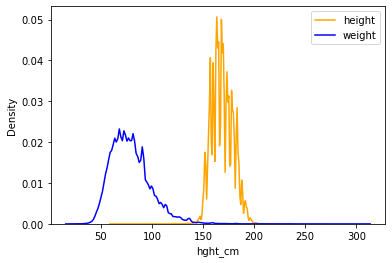

In [21]:
sns.kdeplot(data=df['hght_cm'], color='orange', label='height')
sns.kdeplot(data=df['wght_kg'], color='blue', label='weight')
plt.legend()

In this plot the data share a common $y$-axes, density, which means the PDF integrates to $1$, or $100$%. But because the $x$-axis are different, a comparison is not straightforward. This is where the $z$-scores come in. By switching to $z$scores all data share a common $x$-axes. 

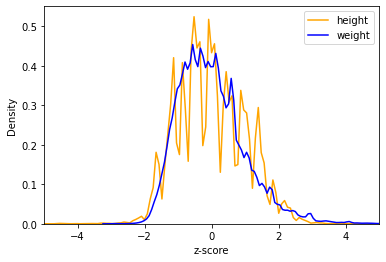

In [23]:
sns.kdeplot(data=df['z-hght'], color='orange', label='height')
sns.kdeplot(data=df['z-wght'], color='blue', label='weight')
plt.xlim(-5,5) # -5 to 5 standard deviations
plt.xlabel('z-score')
plt.legend()